Для начала нужно добавить необходимые библиотеки:
numpy, pandas, matplotlib, sklern, tenserflor, copy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

import setuptools.dist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from copy import copy

**EDA и ресерч-анализ**

Считаем данные

In [3]:
data = pd.read_csv('dataset.csv')

Выведем данные

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
# Размерность данных
print(f"Размер данных: {data.shape}")

# Типы данных
print("\nТипы данных в столбцах:")
print(data.dtypes)

# Пропуски
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

# Основные статистики
print("\nОсновные статистики числовых столбцов:")
print(data.describe())


Размер данных: (114000, 21)

Типы данных в столбцах:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Количество пропущенных значений:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
aco

Согласно выведенной информации в датасете 114000 песен
Все столбцы датасета:
track_id - Идентификатор трека.
artists - Исполнители.
album_name - Название альбома.
track_name - Название трека.
popularity - Популярность.
duration_ms - Длительность в миллисекундах.
explicit - Нецензурная лексика (True/False).
danceability - Танцевальность.
energy - Энергичность.
key - Тональность (ключ).
loudness - Громкость (в децибелах).
mode - Лад (мажор/минор).
speechiness - Речитативность.
acousticness - Акустичность.
instrumentalness - Инструментальность.
liveness - Живость (ощущение "живого" выступления).
valence - Валентность (эмоциональная окраска).
tempo - Темп (в BPM - ударах в минуту).
time_signature - Размер такта.
track_genre - Жанр трека.

Создадим матрицу корреляции

In [6]:
def ms_to_min(x):
    return round(x/60000, 1)

data['duration_ms'] = data['duration_ms'].apply(ms_to_min)


data = data.rename(columns={'duration_ms' : 'duration_min'})


Нечисловые столбцы:
Index(['track_id', 'artists', 'album_name', 'track_name', 'explicit',
       'track_genre'],
      dtype='object')


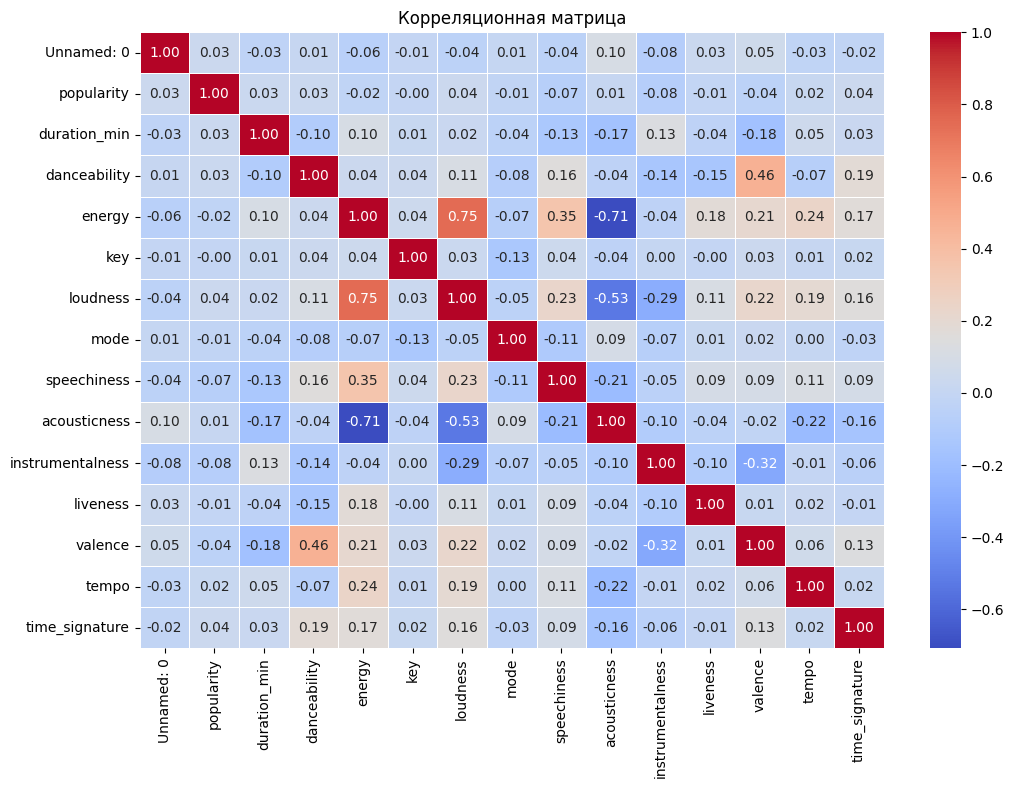

In [7]:
corr_matrix = data.select_dtypes(include=['number']).corr(method='spearman')
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
df = data.drop(non_numeric_columns, axis=1)
print("Нечисловые столбцы:")
print(non_numeric_columns)


corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()



Судя по матрице корреляции все признаки имеют очень слабую корреляцию с основным признаком "популярность". Тогда построим графики взаимодействия наиболее высококоррелирющих признаков.

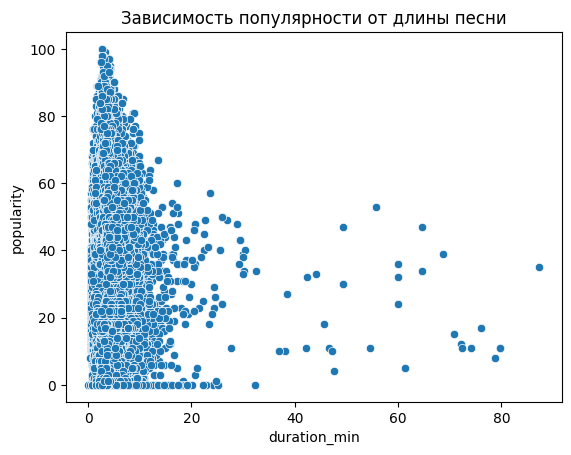

In [8]:

sns.scatterplot(x=df['duration_min'], y=df['popularity'])
plt.title('Зависимость популярности от длины песни')
plt.show()


судя по графику наиболее популярные песни длиной от 2 до 5 минут. Популярность более длинных песен сравнительно ниже. 
Выясним самых популярных артистов.

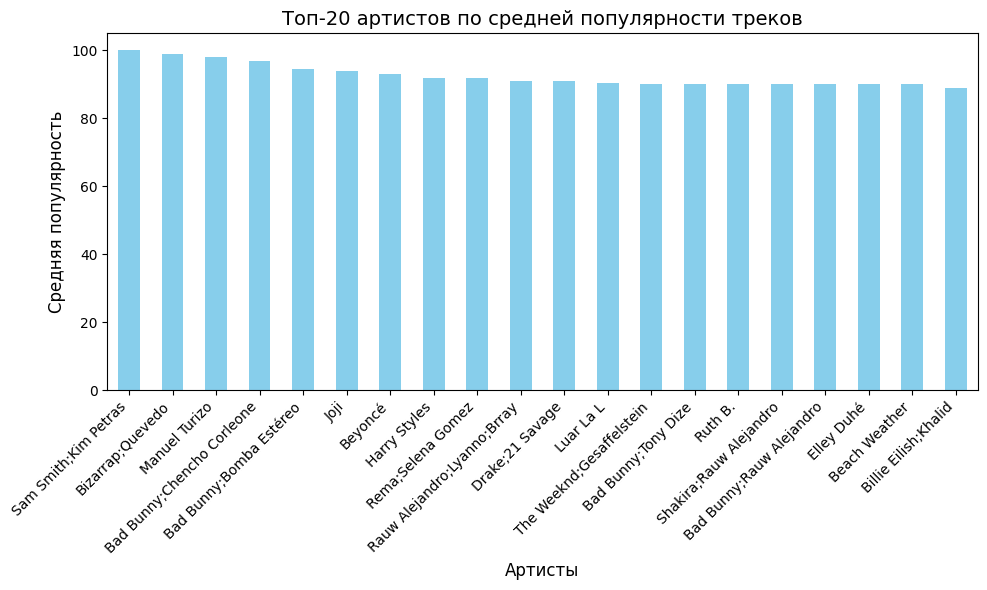

In [9]:
top_artists = data.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Топ-20 артистов по средней популярности треков', fontsize=14)
plt.xlabel('Артисты', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

График показывает 20 популярных артистов по средней популярности их песен. Теперь узнаем самые популярные жанры

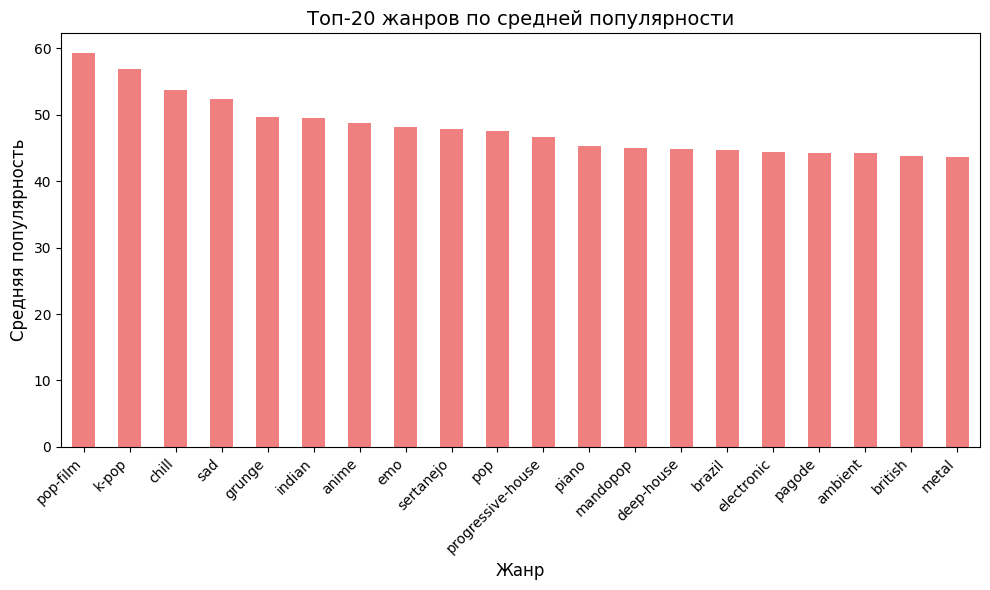

In [10]:
top_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20)


plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='lightcoral')


plt.title('Топ-20 жанров по средней популярности', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


Наиболее популярными являются pop-film, k-pop, chill

Исследуем признаки которые коррелируют между собой наиболее сильно, а именно:

**Энергичность-Громкость**

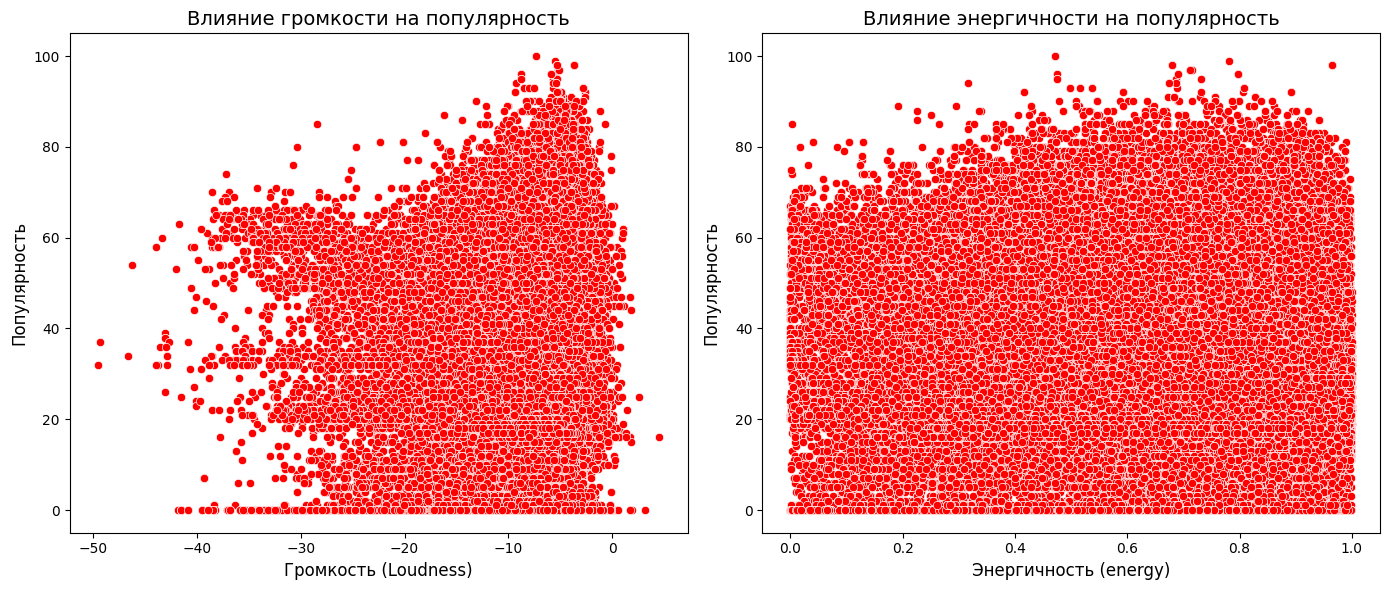

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  
sns.scatterplot(x=data['loudness'], y=data['popularity'], color='r')
plt.title('Влияние громкости на популярность', fontsize=14)
plt.xlabel('Громкость (Loudness)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)

plt.subplot(1, 2, 2) 
sns.scatterplot(x=data['energy'], y=data['popularity'], color='r')
plt.title('Влияние энергичности на популярность', fontsize=14)
plt.xlabel('Энергичность (energy)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)

plt.tight_layout()
plt.show()


Судя по графикам большинство треков имеют громкость от -20 до 0. Песни с энергичностью 0.8 более популярные чем другие. Также судя по матрице корреляции можно сделать вывод что громкая песня с высокой доли вероятности будет энергичная.

**Настроение-Танцевальность**

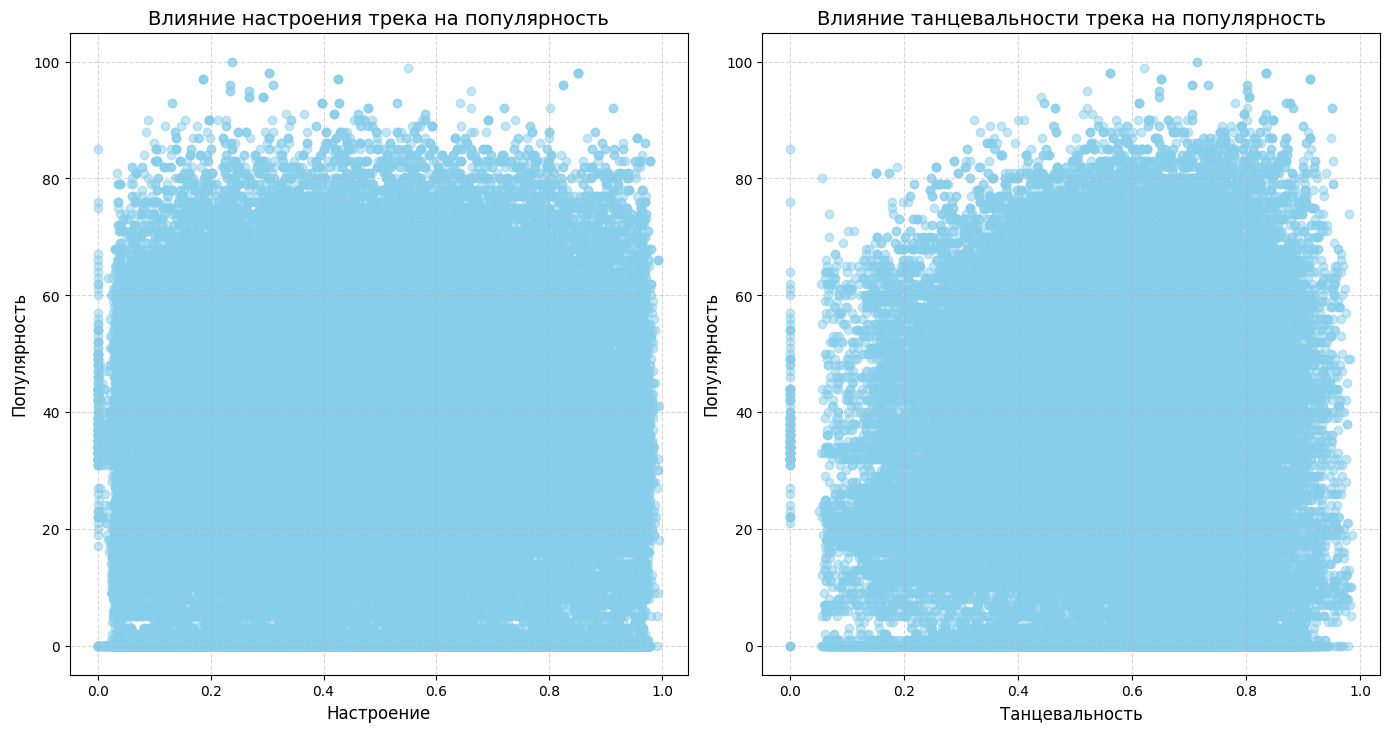

In [12]:
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.scatter(data['valence'], data['popularity'], alpha=0.5, c='skyblue')
plt.title("Влияние настроения трека на популярность", fontsize=14)
plt.xlabel("Настроение", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
plt.scatter(data['danceability'], data['popularity'], alpha=0.5, c='skyblue')
plt.title("Влияние танцевальности трека на популярность", fontsize=14)
plt.xlabel("Танцевальность", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

Из графиков можно сделать вывод что настроение не влияет на популярность, а вот танцевальность влияет тем, что чем она выше тем более популярен трек(наиболее популярны песни с настроением от 0.6 до 0.8). На основе матрицы корреляции выходит, что треки с хорошим настроением могут быть более привлекательными для людей, которые любят танцевать, что также объясняет корреляцию между танцевальностью и настроением.

**Акустичность-Энергичность**

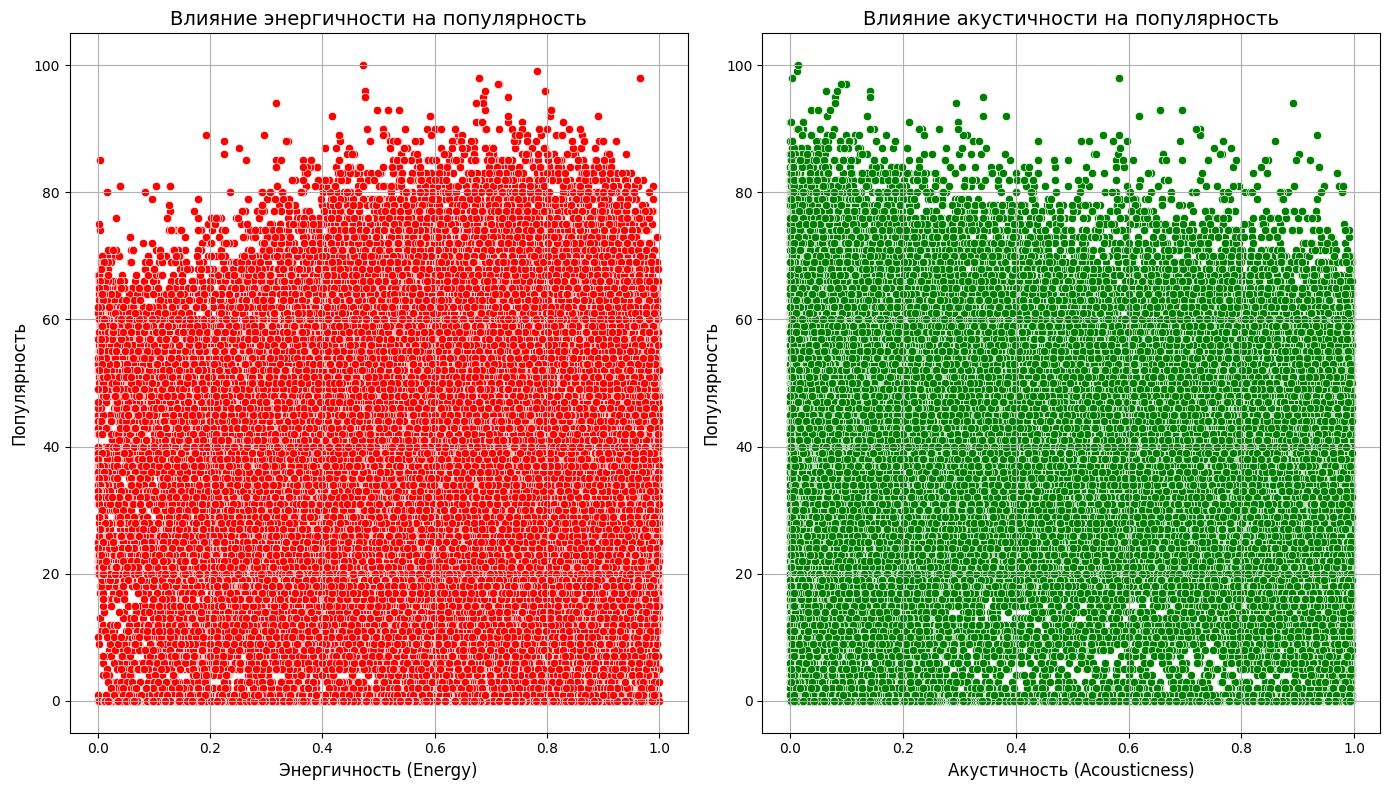

In [13]:

# График влияния энергичности на популярность
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['energy'], y=data['popularity'], color='r')
plt.title('Влияние энергичности на популярность', fontsize=14)
plt.xlabel('Энергичность (Energy)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)
plt.grid(True)

# График влияния акустичности на популярность
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['acousticness'], y=data['popularity'], color='g')
plt.title('Влияние акустичности на популярность', fontsize=14)
plt.xlabel('Акустичность (Acousticness)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


По графику акустичости можно сделать вывод что чем она больше тем менее популярной будет песня. По сильной отрицательной корреляции -0.71 можно сделать вывод что чем энергичнее трек тем меньше вероятность что он будет акустическим

**Вывод:**

1) Не один признак не имеет сильной корреляции с признаком "Популярность".
2) Длинные треки(больше 5 минут) менее популярны чем короткие треки(меньше 5 минут)
3) Высокая корреляция между энергичностью и громкостью говорит о том что они тесно связаны друг с другом.
4) Наиболее популярные жанры: pop-film, k-pop, chill

**2. Feature Engineering**

На основе графиков и матрицы корреляции создадим новые признаки и проверим как они влияют на популярность

In [8]:
# Создание новых признаков
data['emotional_energy'] = data['valence'] * data['energy'] #Энергичность-Настроение
data['dance_intensity'] = data['danceability'] * data['energy'] #Танцевальность-Энергичность
data['loudness_liveness_ratio'] = data['loudness'] / (data['liveness'] + 1) #Соотношение громкости и живости
data['loudness_energy'] = data['loudness'] * data['energy'] #Громкость-Энергичность



Матрица корреляции на новых признаках

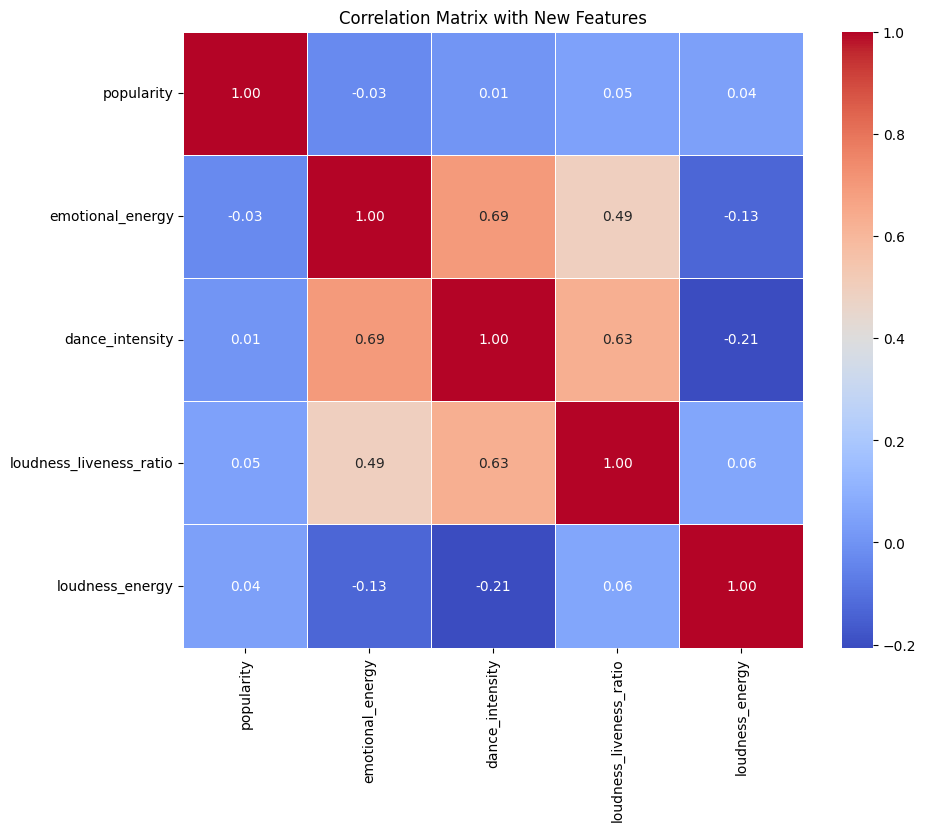

In [9]:
selected_features = ['popularity', 'emotional_energy', 'dance_intensity', 
                     'loudness_liveness_ratio', 'loudness_energy']

# Создаём матрицу корреляции
corr_matrix_new = data[selected_features].corr()

# Визуализация матрицы корреляции
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with New Features')
plt.show()



1. Мы видим что соотношение громкости с живостью имеет высокую корреляцию с Танцевальностью-Настроением, что говорит нам  что громкость и живость могут быть связаны с определёнными жанрами или стилями музыки, например, более энергичные и громкие треки могут быть более живыми и динамичными (например, в танцевальной или электронной музыке).
2. Высокая корреляция между Танцевальностью-Энергичностью с одной стороны, а также Громкостью-Живостью с другой, указывает на то, что эти характеристики тесно связаны с общей динамичностью и интенсивностью трека. Это поможет понять, как различные характеристики музыки (ритм, интенсивность, громкость) влияют на восприятие трека и его популярность
3. Корреляция с целевым признаков "Популярность" все так же очень низкая, что говорит об отсутствии линейной зависимости

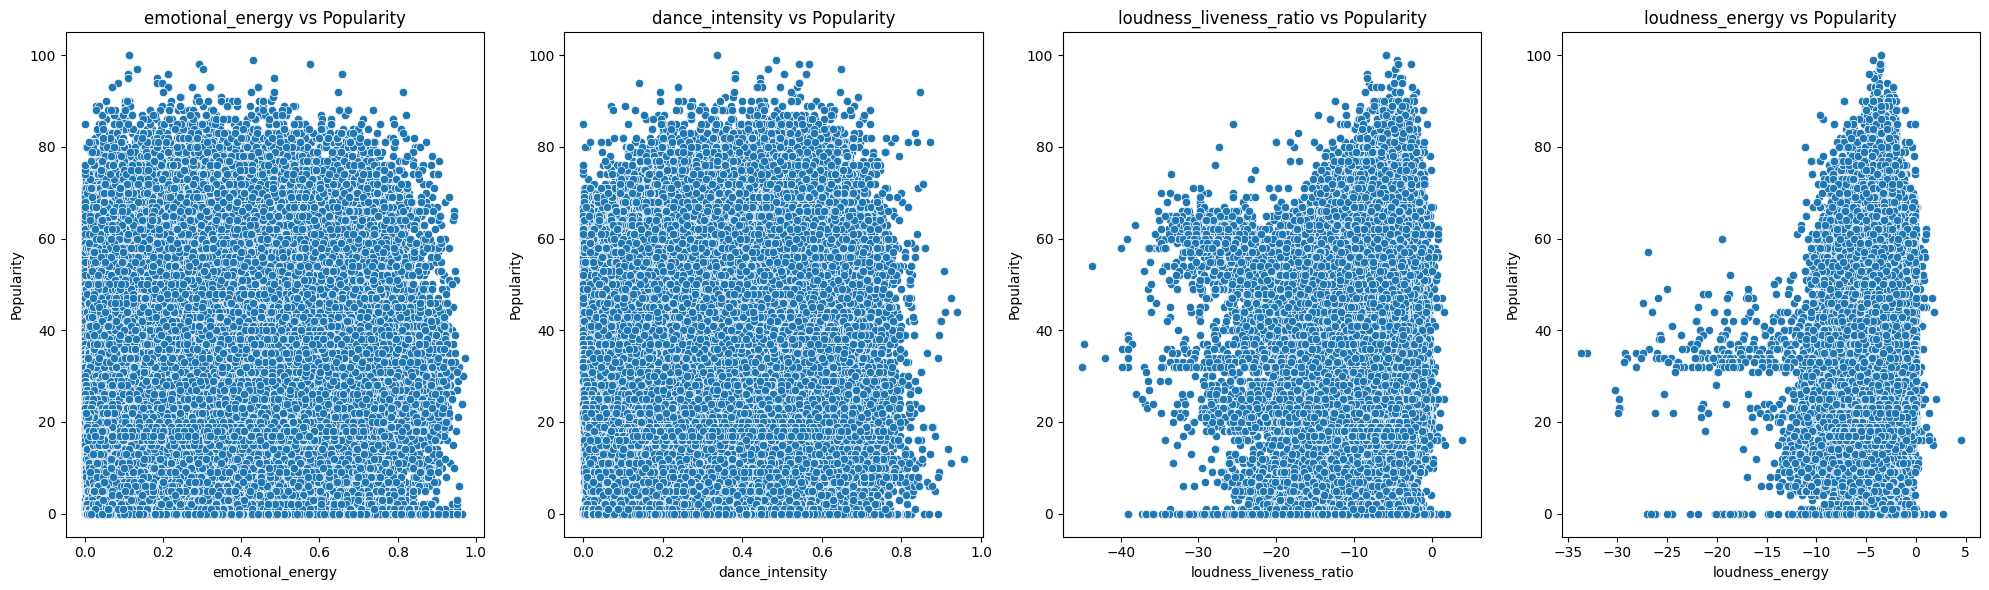

In [10]:
new_features = ['emotional_energy', 'dance_intensity', 'loudness_liveness_ratio', 'loudness_energy']


plt.figure(figsize=(20, 6))
for i, feature in enumerate(new_features):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=data[feature], y=data['popularity'])
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Для Эмоциональности-Энергичности наиболее популярными стали треки в диапазоне 0.1 - 0.4. Для Танцевальности-Энергичности показатели 0.4 до 0.6.
соотношение живости и громкости имеет большое количество выбросов, а наиболее высокие значения популярности в диапазроне от -5 до 0. Та же история с Громкостью-Энергичностью.
Изучим Важность признаков

**Feature Engereering**

Очистка данных от нулевых строк и приведение датасета к формату подходящим для обучения

In [11]:
data = data.drop(data.columns[0], axis=1)
data
data.isnull().sum()

track_id                   0
artists                    1
album_name                 1
track_name                 1
popularity                 0
duration_min               0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre                0
emotional_energy           0
dance_intensity            0
loudness_liveness_ratio    0
loudness_energy            0
dtype: int64

Удаление всех пустых строк из столбцов artists, album_name, track_name

In [12]:
non_string_artists = [(artist, idx+1) for idx, artist in enumerate(data['artists']) 
                     if not isinstance(artist, str)]

for artist, idx in non_string_artists:
    print(artist, idx)
       
data.iloc[65900]

data = data.dropna()



nan 65901


In [13]:
data.isnull().sum()

track_id                   0
artists                    0
album_name                 0
track_name                 0
popularity                 0
duration_min               0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre                0
emotional_energy           0
dance_intensity            0
loudness_liveness_ratio    0
loudness_energy            0
dtype: int64

Замена типа столбца с bool, с которым не может работать ML на int

In [14]:
data['explicit'] = data['explicit'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   track_id                 113999 non-null  object 
 1   artists                  113999 non-null  object 
 2   album_name               113999 non-null  object 
 3   track_name               113999 non-null  object 
 4   popularity               113999 non-null  int64  
 5   duration_min             113999 non-null  float64
 6   explicit                 113999 non-null  int64  
 7   danceability             113999 non-null  float64
 8   energy                   113999 non-null  float64
 9   key                      113999 non-null  int64  
 10  loudness                 113999 non-null  float64
 11  mode                     113999 non-null  int64  
 12  speechiness              113999 non-null  float64
 13  acousticness             113999 non-null  float64
 14  instrumen

Переведем все столбцы типа "object" в int

In [15]:
object_columns = data.select_dtypes(include=['object']).columns
labels = {}

for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    labels[col] = le

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   track_id                 113999 non-null  int32  
 1   artists                  113999 non-null  int32  
 2   album_name               113999 non-null  int32  
 3   track_name               113999 non-null  int32  
 4   popularity               113999 non-null  int64  
 5   duration_min             113999 non-null  float64
 6   explicit                 113999 non-null  int64  
 7   danceability             113999 non-null  float64
 8   energy                   113999 non-null  float64
 9   key                      113999 non-null  int64  
 10  loudness                 113999 non-null  float64
 11  mode                     113999 non-null  int64  
 12  speechiness              113999 non-null  float64
 13  acousticness             113999 non-null  float64
 14  instrumen

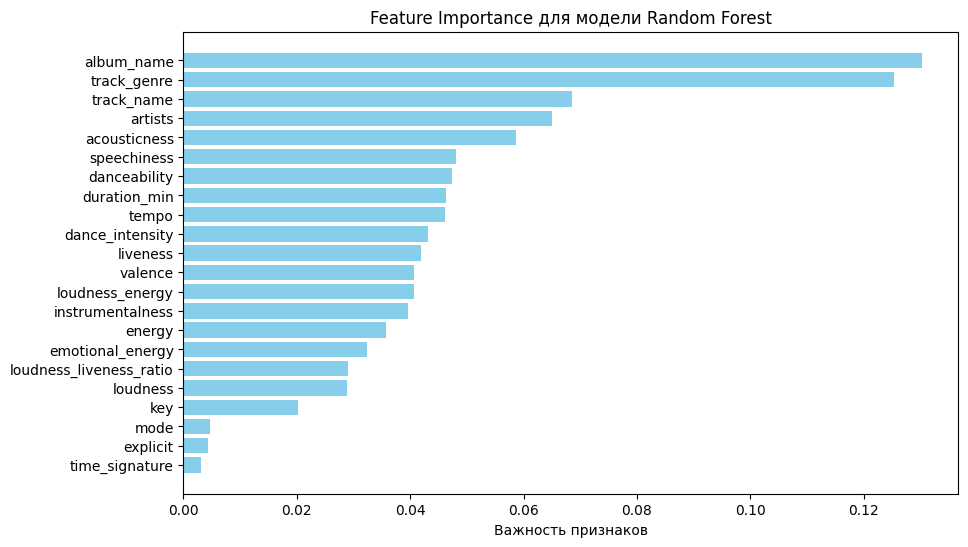

In [16]:
features = data.drop(columns=['popularity', 'track_id'])
target = data['popularity']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
plt.barh(features.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel('Важность признаков')
plt.title('Feature Importance для модели Random Forest')
plt.show()


album_name, track_genre, track_name являются наиболее значащими признаками влияющими на популярность. time_signature, explicit, mode наименее значащими, значит их можно исключить

Создадим простую модель

In [17]:
important_features = data.drop(
    columns=['popularity', 'valence', 'time_signature', 'key', 'mode', 'liveness', 
             'emotional_energy', 'track_id', 'energy', 'loudness']
).columns.to_list()

In [30]:
X = data[important_features]
y = data['popularity']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Absolute Error: 10.217269918546366
Mean Squared Error: 192.94808428918705
R2 Score: 0.6110619261257932


**Вывод**

1. Результаты говорят о том, что модель имеет разумную производительность. Она объясняет примерно 61% вариации в данных (что довольно хорошо для регрессионных моделей на реальных данных), но все же есть пространство для улучшений.
2. MAE и MSE могут быть снижены, что указывает на возможность улучшения точности модели.

**Эксперименты с моделями**

Линейная регрессия

Разделим данные на обучающую и тестовую выборки

In [18]:
X = data[important_features]
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(91199, 14) (22800, 14) (91199,) (22800,)


In [19]:
def cross_cal(model):
    scoring = {
      'mse': 'neg_mean_squared_error',
      'r2': 'r2'
    }

    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    return results

def print_cross_validate(results):
    mse = -results['test_mse']
    r2 = results['test_r2']

    print("Средний MSE:", round(mse.mean(), 2))
    print("Лучший MSE:", round(mse.min(), 2))
    print()
    print("Средний R^2:", round(r2.mean(), 2))
    print("Лучший R^2:", round(r2.max(), 2))

Выбор признаков для обучения модели

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_lr = lr_model.predict(X_test)

# Оценка качества модели
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}")

MAE: 18.49
MSE: 487.74
R^2 Score: 0.02


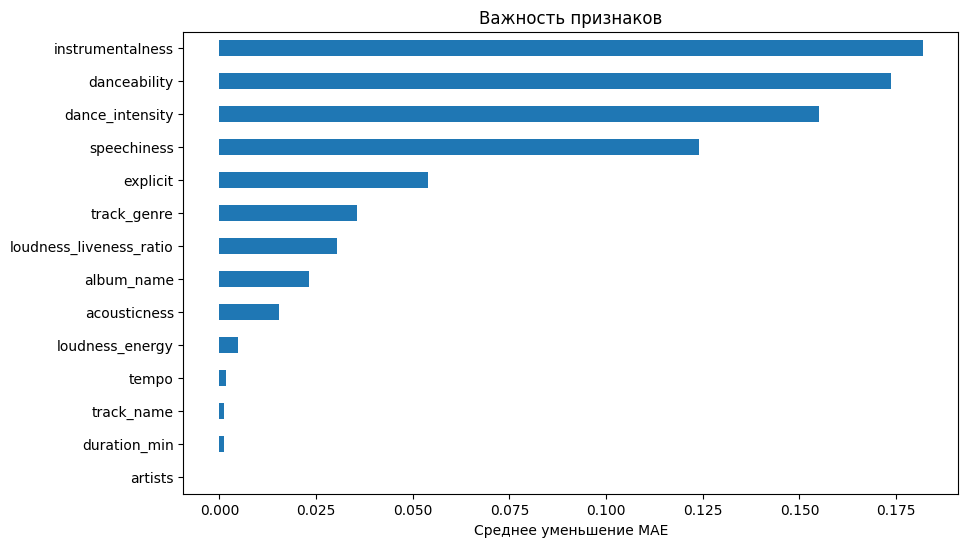

In [27]:
result = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)


importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Наиболее значащие признаки: Инструментальность, Танцевальность, Танцевальность-Энергичность

In [57]:
lr_cross = cross_cal(lr_model)
print_cross_validate(lr_cross)

Средний MSE: 487.19
Лучший MSE: 482.54

Средний R^2: 0.02
Лучший R^2: 0.02


Дерево решений

Изначально точность модели оставляла желать лучшего поэтому я использовал GridSearch для поиска оптимальных параметров

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

# Обучаем модель с GridSearchCV
grid_search.fit(X_train, y_train)

# Выводим лучшие гиперпараметры
print("Лучшие гиперпараметры:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Лучшие гиперпараметры: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [28]:
dt_model = DecisionTreeRegressor(random_state=42, 
                                 max_depth=20, 
                                 min_samples_split=10, 
                                 min_samples_leaf=4)

dt_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_dt = dt_model.predict(X_test)

# Оценка качества модели
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"R^2 Score: {r2_dt:.2f}")


MAE: 13.63
MSE: 368.72
R^2 Score: 0.26


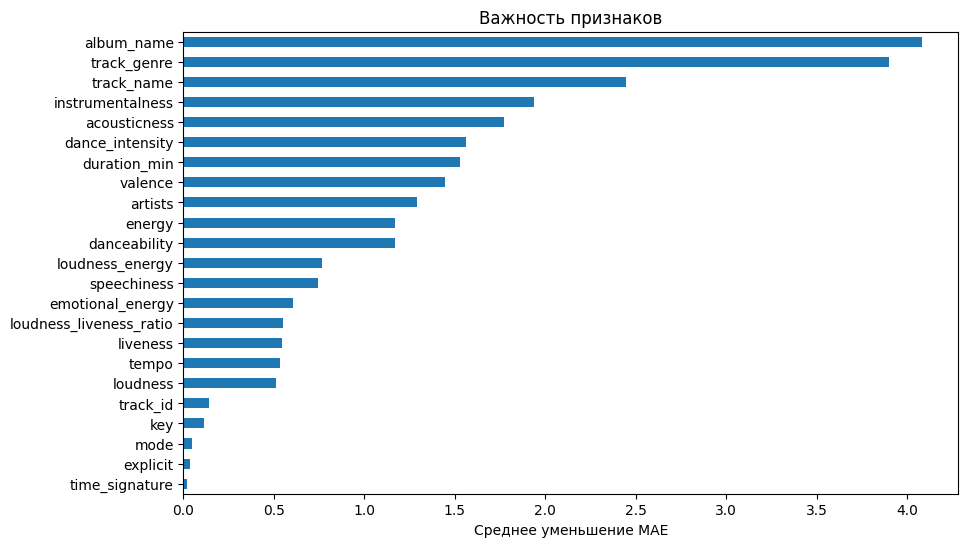

In [53]:
result = permutation_importance(dt_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)


importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Наиболее значащие признаки: Название альбома, Жанр, Название песни

In [35]:
cross_forest = cross_cal(dt_model)
print_cross_validate(cross_forest)


Средний MSE: 385.03
Лучший MSE: 371.98

Средний R^2: 0.23
Лучший R^2: 0.25


**Градиентный бустинг**

Градиентый бустинг без поиска оптимальных параметров, показал плохой результат в R2 = 0.22, поэтому снова используем Gridsearch

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'learning_rate': [0.01, 0.05, 0.1],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Глубина деревьев
    'subsample': [0.8, 1.0],  # Доля выборки для каждого дерева
}


gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2',  # Используем R^2 как метрику для выбора лучшей модели
    n_jobs=-1, 
    verbose=1
)

# Запуск поиска
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [37]:
# Обучение модели с лучшими параметрами
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)

best_gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_best = best_gb_model.predict(X_test)


mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE: {mae_best:.2f}")
print(f"MSE: {mse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")


MAE: 10.44
MSE: 192.12
R^2 Score: 0.61


Проверим важность признаков

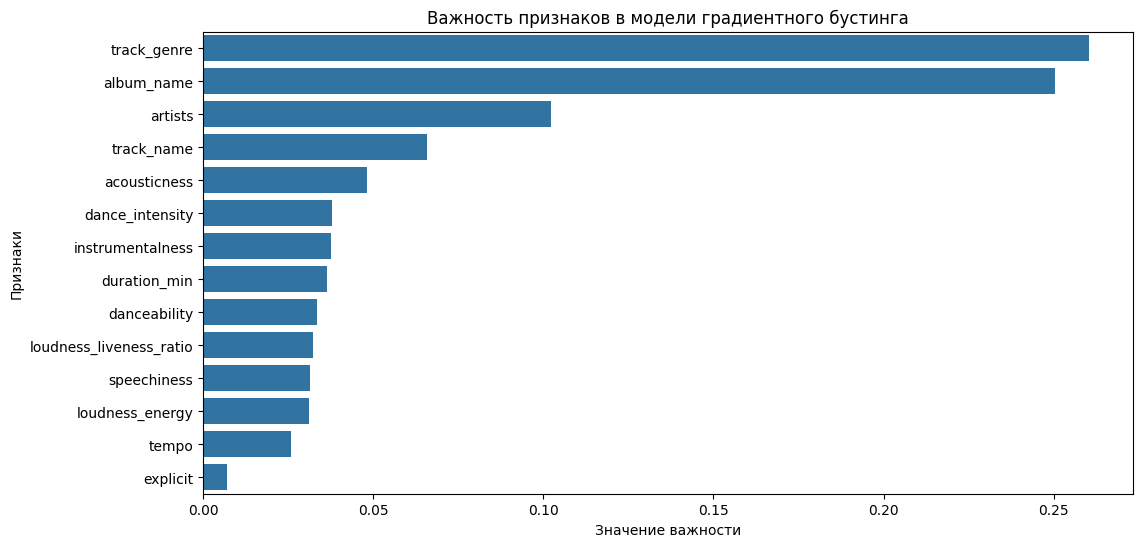

In [34]:
feature_importance = best_gb_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Важность признаков в модели градиентного бустинга')
plt.xlabel('Значение важности')
plt.ylabel('Признаки')
plt.show()

Наиболее значащими признаками стали: Жанр, Название альбома, Артист. Сделаем кросс-валидацию

In [38]:
gb_cross = cross_cal(best_gb_model)
print_cross_validate(gb_cross)

Средний MSE: 199.59
Лучший MSE: 194.51

Средний R^2: 0.6
Лучший R^2: 0.61


**Нейросеть**

Обучение модели на выбранных признаках

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

history = build_model()
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred = model.predict(x_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 468.6412 - val_loss: 470.8633
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 454.6703 - val_loss: 454.0026
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 444.3370 - val_loss: 448.3797
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - loss: 440.3518 - val_loss: 440.4048
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - loss: 437.3864 - val_loss: 438.0540
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 429.2281 - val_loss: 434.1967
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 425.9097 - val_loss: 432.0065
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 421.9448 - val_loss: 431.0710
Epoch 9/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 421.1072 - val_loss: 430.3894
Epoch 10/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - loss: 415.9380 - val_loss: 426.5500
Epoch 11/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - loss: 413.

Модель показывает слабое R2 и высокий MSE. С большой вероятностью модель переобучается, сделаем график тестовой и обучающей выборки

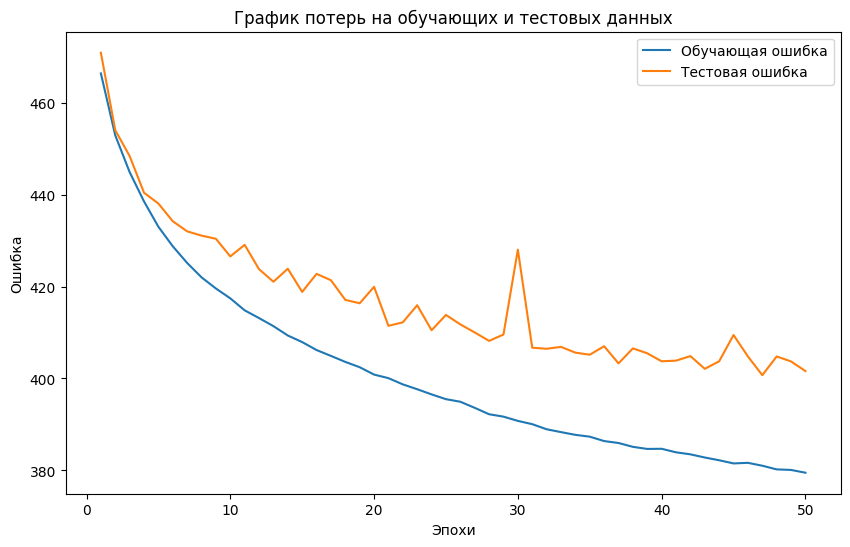

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_loss, label='Обучающая ошибка')
plt.plot(range(1, 51), val_loss, label='Тестовая ошибка')
plt.title('График потерь на обучающих и тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Модель действительно переобучается, так как обучающая выборка падает быстрее, чем тестовая. Попробуем избежать переобучения значительно улучшив модель


In [26]:
from scikeras.wrappers import KerasRegressor

model_wrapper = KerasRegressor(history, epochs=50, batch_size=32, verbose=0)

# Запуск кросс-валидации
model1_cross = cross_cal(model_wrapper)
print_cross_validate(model1_cross)

Средний MSE: 484.43
Лучший MSE: 470.85

Средний R^2: 0.03
Лучший R^2: 0.05


In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучаем модель
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
y_pred = model.predict(x_test_scaled)

# Оценка модели
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 864.2903 - val_loss: 454.7192
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 461.0599 - val_loss: 448.0346
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 451.9543 - val_loss: 437.7432
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 444.7945 - val_loss: 432.4120
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 440.3083 - val_loss: 428.5074
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 435.8590 - val_loss: 425.4778
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 431.0326 - val_loss: 422.2943
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 428.5181 - val_loss: 419.5994
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 428.1409 - val_loss: 420.5308
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 426.9833 - val_loss: 415.9030
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 425.7

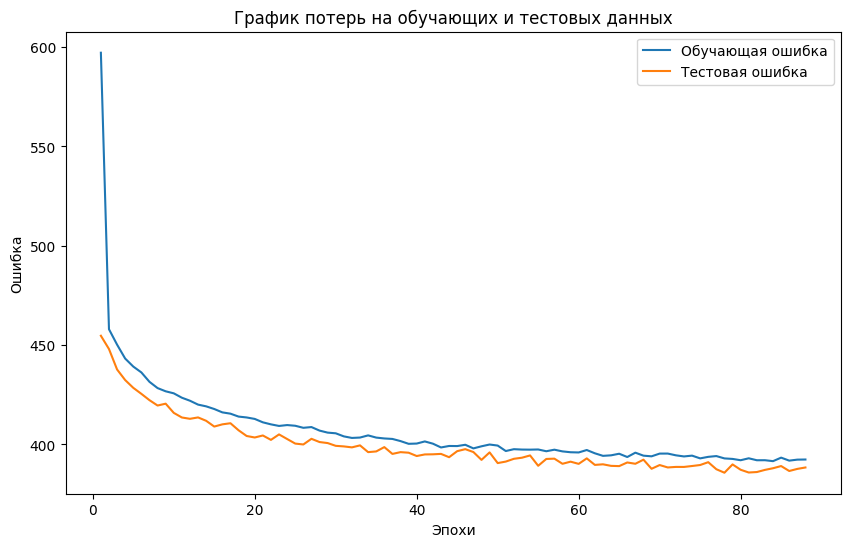

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(range(1, 89), train_loss, label='Обучающая ошибка')
plt.plot(range(1, 89), val_loss, label='Тестовая ошибка')
plt.title('График потерь на обучающих и тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

EarlyStop остановил обучение на 88 эпохе, чтобы избежать переобучения. По графику видно что переобучения нет. R2 несущественно улучшился на 
0.04, MSE снизился на 24, MAE практически не изменился.

In [39]:
model_wrapper2 = KerasRegressor(model, epochs=100, batch_size=32, verbose=0)

# Запуск кросс-валидации
model2_cross = cross_cal(model_wrapper2)
print_cross_validate(model2_cross)

Средний MSE: 464.11
Лучший MSE: 460.05

Средний R^2: 0.07
Лучший R^2: 0.07


В итоге после тестов с моделями мы получили следующие значения:


**Линейная регрессия**
MAE: 18.49
MSE: 487.74
R^2 Score: 0.02
Очень плохие результаты.

**Нейросеть 1**
MAE: 15.983098587592442
MSE: 398.568638360577
R2 Score: 0.19657909870147705
Лучше чем линейная регрессия, однако значения все равно слабые.

**Нейросеть 2**
MAE: 15.503165693602018
MSE: 375.5850399448107
R2 Score: 0.24290865659713745
Значения лучше чем у 1 нейросети, но обьясняющая способность все равно слабая

**Дерево решений**
MAE: 13.63
MSE: 368.72
R^2 Score: 0.26
Гораздо лучшее обьяснение зависимостей.

**Градиентный бустинг**
MAE: 10.44
MSE: 192.12
R^2 Score: 0.61
Самые лучшие значения, следовательно более лучшая обьясняемость зависимостей

**Итоговый вывод**

В ходе поставленной работы мы научились проводить полноценный анализ данных музыкальных треков, начиная с их предобработки и заканчивая построением моделей машинного обучения для предсказания популярности. Мы разобрались, как выполнять исследовательский анализ данных (EDA), выявлять зависимости между признаками и находить наиболее значимые факторы, влияющие на популярность.

Мы научились эффективно применять методы feature engineering: трансформировать и комбинировать признаки для повышения их информативности. Благодаря этому удалось создать новые полезные параметры, такие как длительность в минутах и комбинацию громкости с энергичностью, которые помогли улучшить качество моделей.

В процессе работы с моделями мы попробовали различные алгоритмы — от линейной регрессии до сложных ансамблевых методов, таких как случайный лес и градиентный бустинг. Мы научились настраивать гиперпараметры моделей, проводить кросс-валидацию для оценки стабильности, а также сравнивать их по метрикам, таким как MAE, MSE и R². В результате наилучшие показатели были достигнуты с использованием градиентного бустинга, что показало важность тщательной настройки параметров и выбора подходящего алгоритма.

Таким образом, проведенная работа позволила получить ценные навыки работы с данными, извлечения полезных признаков и применения моделей машинного обучения для решения практических задач.